In [6]:
import os, cv2, tqdm
import copy
from tqdm import tqdm

from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
from detectron2.data import detection_utils as utils
from detectron2.data.datasets import register_coco_instances
from detectron2.data import build_detection_test_loader
from detectron2.data import MetadataCatalog, DatasetCatalog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [7]:
def MyMapper(dataset_dict):
    
    dataset_dict = copy.deepcopy(dataset_dict)
    image = utils.read_image(dataset_dict['file_name'], format='BGR')
    
    dataset_dict['image'] = image
    
    return dataset_dict


In [8]:
try:
    register_coco_instances('coco_trash_test', {}, '../dataset/test.json', '../dataset/')
except AssertionError:
    pass

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'))
TrashMeta = MetadataCatalog.get("coco_trash_test")
# config 수정하기
cfg.DATASETS.TEST = ('coco_trash_test',)
cfg.DATALOADER.NUM_WOREKRS = 2
cfg.OUTPUT_DIR = './output'
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, 'model_final.pth')
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3

predictor = DefaultPredictor(cfg)
test_loader = build_detection_test_loader(cfg, 'coco_trash_test', MyMapper)

  0%|          | 0/4871 [00:00<?, ?it/s]

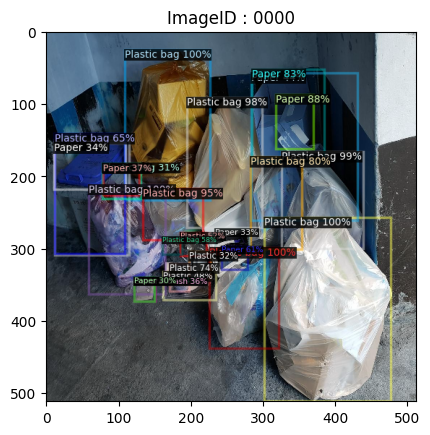

  0%|          | 1/4871 [00:00<1:07:45,  1.20it/s]

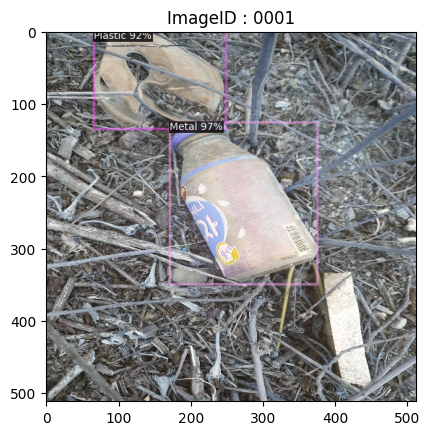

  0%|          | 2/4871 [00:01<52:02,  1.56it/s]  

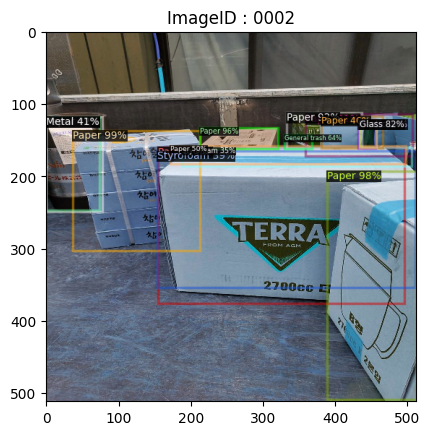

  0%|          | 3/4871 [00:01<47:32,  1.71it/s]

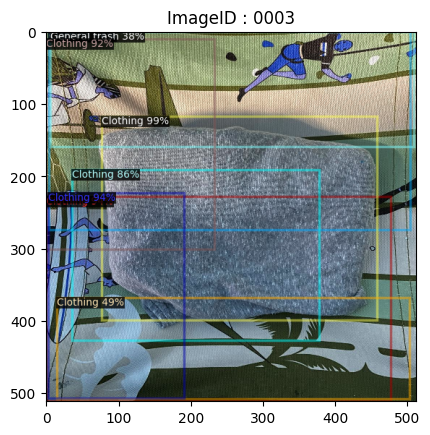

  0%|          | 4/4871 [00:02<1:00:03,  1.35it/s]

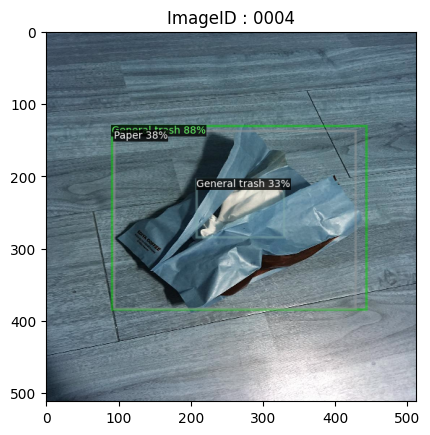

  0%|          | 5/4871 [00:03<53:46,  1.51it/s]  

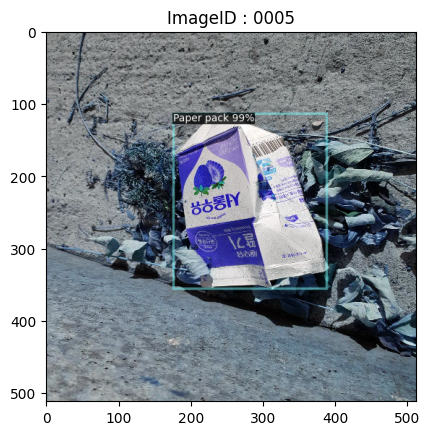

  0%|          | 6/4871 [00:03<49:28,  1.64it/s]

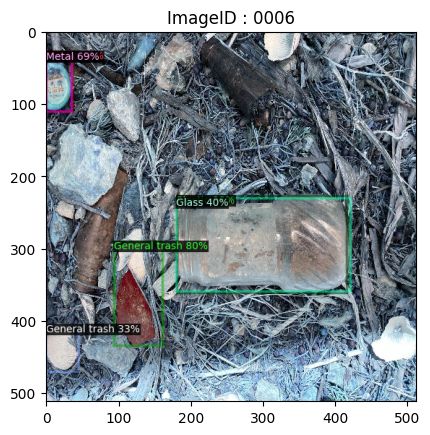

  0%|          | 7/4871 [00:04<47:04,  1.72it/s]

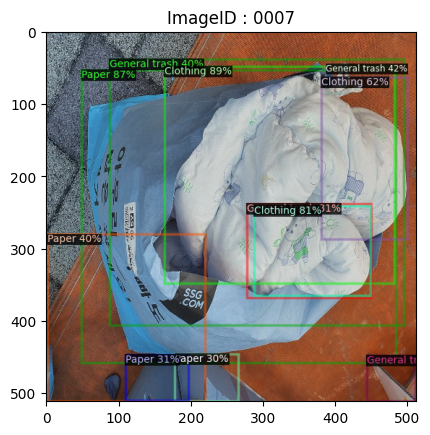

  0%|          | 8/4871 [00:04<45:50,  1.77it/s]

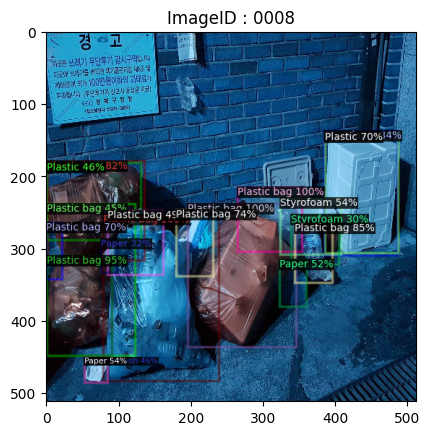

  0%|          | 9/4871 [00:05<45:37,  1.78it/s]

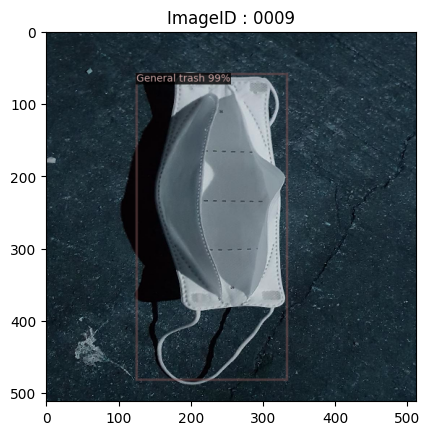

  0%|          | 10/4871 [00:05<44:10,  1.83it/s]

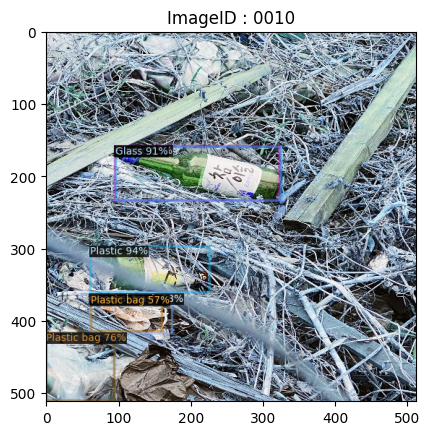

  0%|          | 10/4871 [00:06<53:20,  1.52it/s]


In [14]:

BreakCounter = 10
for data in tqdm(test_loader):
    
    data = data[0]
    im = cv2.imread(data['file_name'])
    outputs = predictor(data['image'])['instances']
    output = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                    metadata = TrashMeta,
                    scale=0.5,
                    instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
                    )
    out = v.draw_instance_predictions(output["instances"].to("cpu"))
    plt.imshow(out.get_image()[:, :, ::-1])
    ImageId = data['file_name'].replace('../dataset/test/', 'ImageID : ')
    ImageId = ImageId.replace('.jpg', '')
    plt.title(ImageId)
    plt.show()
    
    
    if BreakCounter == 0:
        break
    else:
        BreakCounter=BreakCounter-1